In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [3]:
path = ""
df_eng = pd.read_csv(path + "alunos_engcomp.csv")
df_ccomp = pd.read_csv(path + "alunos_ccomp.csv")
frames = [df_eng, df_ccomp]
df = pd.concat(frames)

In [ ]:
dist_sex_geral = df['SEXO'].value_counts()
print(dist_sex_geral)
dist_sex_eng = df_eng['SEXO'].value_counts()
print(dist_sex_eng)
dist_sex_ccomp = df_ccomp['SEXO'].value_counts()
print(dist_sex_ccomp)

M    2107
F     344
Name: SEXO, dtype: int64
M    1208
F     161
Name: SEXO, dtype: int64
M    899
F    183
Name: SEXO, dtype: int64


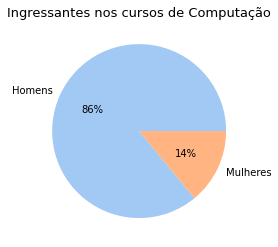

In [ ]:
#define data
data_geral = [dist_sex_geral['M'], dist_sex_geral['F']]
data_eng = [dist_sex_eng['M'], dist_sex_eng['F']]
data_ccomp = [dist_sex_ccomp['M'], dist_sex_ccomp['F']]
labels = ['Homens', 'Mulheres']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data_geral, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Ingressantes nos cursos de Computação", color = 'black', fontsize = '13')
plt.show()

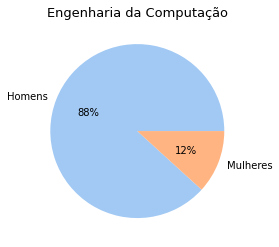

In [ ]:
plt.pie(data_eng, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Engenharia da Computação", color = 'black', fontsize = '13')
plt.show()

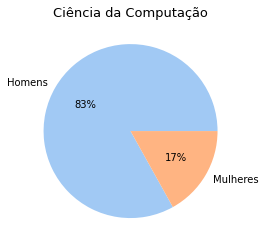

In [ ]:
plt.pie(data_ccomp, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Ciência da Computação", color = 'black', fontsize = '13')
plt.show()

In [ ]:
#só interessa nesse momento o ano de ingresso
periodos = df['PERIODO_INGRESSO']
anos = [periodo[0:4] for periodo in periodos]


#ajustando o dataframe para ficar com apenas os anos
df['ANO_INGRESSO'] = anos

In [ ]:
df_formandos = df[(df["FORMA_EVASAO"] == "Formado") & (df["SEXO"] == "F")]
df_formandos

,Unnamed: 0,ID_PESSOA,NOME_PESSOA,SEXO,DT_NASCIMENTO,FORMA_INGRESSO,FORMA_EVASAO,COD_CURSO,NOME_UNIDADE,MATR_ALUNO,NUM_VERSAO,PERIODO_INGRESSO,DT_EVASAO,PERIODO_EVASAO,ANO_INGRESSO
7,7,268826,ADRIANA DE SOUZA CAMPOS,F,07/08/1987,Vestibular,Formado,5,Engenharia da Computação,2006100950,1990,2006/1º Semestre,01/03/2011,2010/1º Semestre,2006
25,25,34087,ALESSANDRA AGUIAR VILARINHO,F,16/08/1972,Vestibular,Formado,5,Engenharia da Computação,91105503,1990,1993/1º Semestre,NaN,NaN,1993
49,49,34896,ALINE ANTUNES MOTTA,F,26/06/1980,Vestibular,Formado,5,Engenharia da Computação,98100146,1990,1998/1º Semestre,17/06/2004,2003/2º Semestre,1998
56,56,393355,ANA CAROLINA EWALD ELLER,F,28/07/1989,Vestibular,Formado,5,Engenharia da Computação,2007100676,1990,2007/1º Semestre,01/08/2013,2012/2º Semestre,2007
57,57,35415,ANA CLAUDIA MIGUEL NAKAJIMA,F,24/10/1976,Vestibular,Formado,5,Engenharia da Computação,95100104,1990,1995/1º Semestre,NaN,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,74458,TAIZE DE SOUZA FREITAS,F,01/12/1976,Vestibular,Formado,11,Ciência da Computação,96100189,1993,1996/1º Semestre,05/09/2016,2001/1º Semestre,1996
1000,1000,74483,TANIA BARBOSA SALLES,F,12/05/1972,Vestibular,Formado,11,Ciência da Computação,90211220,1993,1990/2º Semestre,NaN,NaN,1990
1028,1028,75644,VALESKA PEREIRA FERNANDES,F,28/07/1971,Vestibular,Formado,11,Ciência da Computação,90211208,1993,1990/2º Semestre,NaN,NaN,1990
1030,1030,75788,VANESSA BATTESTIN,F,01/03/1979,Vestibular,Formado,11,Ciência da Computação,97100052,1993,1997/1º Semestre,24/10/2001,2001/1º Semestre,1997


In [ ]:
anos_u = pd.unique(df['ANO_INGRESSO'])

In [ ]:
def gera_freq(anos_u,df,curso,geral=False,formados=False):
  #chave é ano mas do tipo string
  mulheres = dict.fromkeys(anos_u)

  #quantidade de mulheres que ingressaram em cada ano
  for ano in anos_u:
    if(geral == True):
      dim = df.loc[(df['SEXO'] == 'F') & (df['ANO_INGRESSO'] == ano)].shape
    elif (curso == "engenharia"):
      dim = df.loc[(df['SEXO'] == 'F') & (df['ANO_INGRESSO'] == ano) & (df['COD_CURSO'] == 5)].shape
    elif (curso == "ciencia"):
      dim = df.loc[(df['SEXO'] == 'F') & (df['ANO_INGRESSO'] == ano) & (df['COD_CURSO'] == 11)].shape
    
    mulheres[ano] = dim[0]

  #mudar a chave pra int
  ano_num = np.array(anos_u).astype(int)
  anos_u = np.sort(anos_u)
  freq = []
  for ano in anos_u:
    freq.append(mulheres[a,no])

  return freq



In [ ]:
freq_geral = gera_freq(anos_u,df," ", geral=True)
freq_cc = gera_freq(anos_u,df,"ciencia")
freq_ec = gera_freq(anos_u,df,"engenharia")

TypeError: ignored

In [ ]:
df_dist = pd.DataFrame()
df_dist['Ano'] = anos_u
df_dist['Frequência'] = freq_geral
df_dist.drop(df_dist[df_dist['Ano'] == '1989'].index,inplace=True)
df_dist.sort_values(by=['Ano'],inplace=True)


In [ ]:
df_dist_cc = pd.DataFrame()
df_dist_cc['Ano'] = anos_u
df_dist_cc["Frequência"] = freq_cc
df_dist_cc.drop(df_dist_cc[df_dist_cc['Ano'] == '1989'].index,inplace=True)
df_dist_cc.sort_values(by=['Ano'],inplace=True)

In [ ]:
df_dist_ec = pd.DataFrame()
df_dist_ec['Ano'] = anos_u
df_dist_ec['Frequência'] = freq_ec
df_dist_ec.drop(df_dist_ec[df_dist_ec['Ano'] == '1989'].index,inplace=True)
df_dist_ec.sort_values(by=['Ano'],inplace=True)

In [ ]:
fig = px.line(df_dist, x='Ano', y="Frequência", title="Ingressantes Mulheres",width=800, height=400)
fig.show()

In [ ]:
fig = px.line(df_dist_ec, x='Ano', y="Frequência", title="Ingressantes Mulheres na Engenharia da Computação",width=800, height=400)
fig.show()

1997 apenas 1
2001 e 2009 apenas 2

In [ ]:
fig = px.line(df_dist_cc, x='Ano', y="Frequência", title="Ingressantes Mulheres na Ciência da Computação",width=800, height=400)
fig.show()

2001 e 2007 nenhuma


In [ ]:
curso_ano = pd.crosstab(df['ANO_INGRESSO'],df['SEXO'])
curso_ano

In [ ]:
curso_ano.plot(kind='bar',width=1, color=['red','blue'], grid=False)
plt.suptitle("Relação de Ingressantes nos cursos de computação")
plt.title("na UFES entre 1989 a 2022")
plt.xlabel('Ano');
plt.ylabel('Alunos');
plt.legend();

In [ ]:
#Porcentagem do cruzamento do ano e sexo
curso_ano_per = pd.crosstab(df['ANO_INGRESSO'],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
print(curso_ano_per)

In [ ]:
per_2009 = pd.Series({'Ano':2009, 'Feminino':20.13, 'Masculino':79.87})
per_2010 = pd.Series({'Ano':2010, 'Feminino':19.28, 'Masculino':80.72})
per_2011 = pd.Series({'Ano':2011, 'Feminino':18.68, 'Masculino':81.32})
per_2012 = pd.Series({'Ano':2012, 'Feminino':17.97, 'Masculino':82.03})
per_2013 = pd.Series({'Ano':2013, 'Feminino':17.43, 'Masculino':82.57})
per_2014 = pd.Series({'Ano':2014, 'Feminino':16.94, 'Masculino':83.06})
per_2015 = pd.Series({'Ano':2015, 'Feminino':16.20, 'Masculino':83.80})
per_2016 = pd.Series({'Ano':2016, 'Feminino':15.45, 'Masculino':84.55})
per_2017 = pd.Series({'Ano':2017, 'Feminino':15.15, 'Masculino':84.85})
per_2018 = pd.Series({'Ano':2019, 'Feminino':15.07, 'Masculino':84.93})